In [1]:
import numpy as np
import math
import networkx as nx
from karateclub.node_embedding import Node2Vec
from gensim.models.word2vec import Word2Vec

np.random.seed(42)

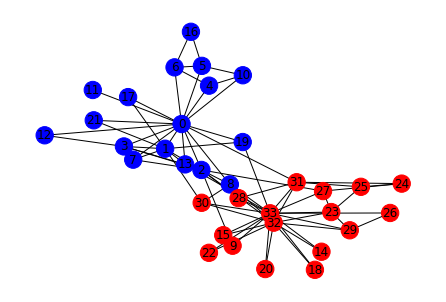

In [2]:
def load_karate():
    G = nx.karate_club_graph()
    colormap = ["blue" if data["club"] == "Mr. Hi" else "red" for _, data in G.nodes(data=True)]

    return G, colormap
    
G, colormap = load_karate()
nx.draw(G, with_labels=True, node_color=colormap)

# Graph Embeddings

<b>Goal:</b> Embed a subgraph or an entire graph G to a vector representation z_G.

## Approach 1

1. Run a standard node embedding technique on each node of the (sub)graph G.
2. Sum or average the node embeddings to a single vector z_G.

z_G = sum over v in G -> z_v 

In [3]:
n2v = Node2Vec(walk_number=10, walk_length=5, p=1.0, q=1.0, dimensions=128)
n2v.fit(G)
Z = n2v.get_embedding()
print("Node Embeddings:\n", Z, "\n\nZ Shape:", Z.shape)

Node Embeddings:
 [[-6.1309431e-03  4.4923713e-03  2.8222071e-03 ...  1.4523641e-03
  -6.6852723e-03  4.7208481e-03]
 [ 2.8384095e-03  6.8760929e-03  5.8848979e-03 ...  4.6388456e-03
   1.5763207e-03 -2.3730827e-05]
 [ 5.5479663e-03  5.4084929e-03  7.6215682e-03 ... -2.7619656e-03
   4.4345260e-03  7.4818917e-03]
 ...
 [-5.6087659e-03 -2.3228680e-03  2.3696199e-03 ...  7.9064379e-03
   3.3976892e-03  2.1286192e-03]
 [ 3.3650920e-03 -6.4177508e-03 -4.7627049e-03 ...  7.7405083e-03
   7.0426972e-03 -3.0673544e-03]
 [ 9.1897481e-04  1.2969001e-03  1.1895263e-03 ... -1.4013723e-03
   2.5670580e-03 -5.4048258e-03]] 

Z Shape: (34, 128)


In [4]:
z_G = Z.sum(axis=0)  # sum over rows
print("Graph Embeddings:\n", z_G)
print("z_G Shape:", z_G.shape)

Graph Embeddings:
 [ 0.02243632 -0.02500752  0.0169709   0.00882913 -0.02671211 -0.00052851
 -0.01145077 -0.02047772 -0.00823176 -0.02074972 -0.04304498  0.02377832
  0.01295927 -0.02471404 -0.03183917  0.00265162 -0.00413384  0.04791955
  0.0154151  -0.02922504 -0.00351988 -0.00311413 -0.05537311 -0.03270181
  0.03053698 -0.03929551 -0.02347529 -0.04253666 -0.01815614  0.0239821
 -0.05266995 -0.00025544  0.02328771 -0.02093386 -0.04580136  0.00426836
  0.03832119  0.00823576  0.02939981 -0.01107648  0.02259498 -0.0312568
  0.03173299  0.01404846  0.01182752  0.02477591 -0.03191882 -0.01233502
  0.00923678 -0.02569024  0.0777106   0.03479186  0.0203933  -0.03685364
 -0.03878969  0.00276163  0.07107905 -0.06112908  0.0128078   0.03020579
  0.03112344  0.00962252 -0.01565823  0.03944474  0.02338752 -0.00389554
  0.09995954 -0.01931732 -0.0085564   0.00371951 -0.02344924 -0.02249762
 -0.02444202  0.00907553 -0.03134287 -0.06881589 -0.06377769 -0.00532925
 -0.05718035 -0.01882009 -0.032755

## Approach 2: Virtual Node

Introduce a "virtual node" to represent the (sub)graph and run a standard graph embedding technique. Connect this virtual node to each node in the (sub)graph and get the embedding for this node.

In [5]:
G, _ = load_karate()
G.add_node(34)
edge_list = [(i, 34) for i in range(34)]
G.add_edges_from(edge_list)

In [6]:
n2v = Node2Vec(walk_number=10, walk_length=5, p=1.0, q=1.0, dimensions=128)
n2v.fit(G)
Z = n2v.get_embedding()
z_G = Z[34,:]
print("Graph Embedding:\n", z_G)
print("z_G Shape:", z_G.shape)

Graph Embedding:
 [-0.00601481  0.00409693  0.00251223 -0.00102315 -0.00170321  0.00567238
 -0.00644958  0.00252036 -0.00562138 -0.00793846 -0.00140428  0.00870403
  0.00395825  0.00316429  0.00422097  0.00497073  0.00091013 -0.00523818
  0.00516174 -0.00131441  0.00032586 -0.00196099 -0.00633119  0.00581141
  0.00550243  0.00064286 -0.00301142  0.00427675  0.00032291 -0.00032529
 -0.00207205 -0.00393237 -0.00587739  0.00058963  0.00492362 -0.0074274
  0.00597714  0.00514371 -0.0028974   0.00201548 -0.00570974  0.00290085
  0.00370811 -0.00166972 -0.00723255  0.00817436 -0.00111301  0.00665107
  0.00389809  0.00337029  0.0057278  -0.00464207 -0.001289   -0.00137847
 -0.00127392 -0.00787736  0.00239761 -0.00674364  0.00463999  0.002953
  0.00748059  0.00344928 -0.00285597  0.00844771 -0.0020788  -0.00357492
  0.00892573 -0.00264299 -0.00740113 -0.00120044  0.00505509 -0.00558849
 -0.00131924 -0.00627829  0.00269448 -0.00124853 -0.00451544 -0.00480254
  0.00044888  0.00237234  0.00576186

## Approach 3: Anonymous Walk Embeddings

### Anonymous Walk

States in anonymous walks correspond to the index of the first time we visited the node in a random walk.

For example, the following random walks:

Random Walk 1: A -> B -> C -> B -> C  
Random Walk 2: C -> D -> B -> D -> B

yield the same Anonymous Walk: 1-> 2 -> 3 -> 2 -> 3.

* The number of possible anonymous walks grows exponentially. For example, there are 5 possible anonymous walks of length 3: 111, 112, 121, 122 and 123. For AW of length 12 there are 4 million possibilities.

In [7]:
def anonymous_random_walk(G, starting_node, length):
    node = starting_node
    first_visit_idx = 1
    visiting_order_lookup = {node: first_visit_idx}

    walk = [str(starting_node)]
    anonymous_walk = [str(first_visit_idx)]
    for _ in range(length-1):
        neighbors = list(G.neighbors(node))
        chosen_node_idx = np.random.choice(len(neighbors), replace=True)
        node = neighbors[chosen_node_idx]
        if node in visiting_order_lookup:
            first_visit_idx = visiting_order_lookup[node]
        else:
            first_visit_idx += 1
            visiting_order_lookup[node] = first_visit_idx

        anonymous_walk.append(str(first_visit_idx))
        walk.append(str(node))

    return anonymous_walk, walk

In [8]:
G, _ = load_karate()
aw, w = anonymous_random_walk(G, starting_node=0, length=5)

print("Random Walk:", " -> ".join([str(n) for n in w]))
print("Anonymous Random Walk:", " -> ".join([str(n) for n in aw]))

Random Walk: 0 -> 31 -> 33 -> 27 -> 2
Anonymous Random Walk: 1 -> 2 -> 3 -> 4 -> 5


<b>Idea:</b>

1. Simulate anonymous walks w_i of length l and record their counts.
2. Represent the graph as a probability distribution over these walks.

For example, for l=3 we can represent the graph as a 5 dimensional vector counting each possibility: 111, 112, 121, 122, 123.

Z_G[i] = probability of anonymous walk w_i in G.

<b> How many random walks m do we need? </b>  
We want the distribution to have error of more than episilon with probability less than delta.

m = ceil(2/episilon^2 * (log(2^n - 2) - log(delta)))  
where n is the total number of anon. walks of length l. \* 

For example: there are n=877 anon. walks of length l=7. If we set episilon=0.1 and delta=0.01 then we need to generate m=122.500 random walks.

The relationship between n and m is given by bell numbers

In [9]:
def embed_graph_anonymous_walk(G, length):
    l_to_n_map = {
        2: 2,
        3: 5,
        4: 15,
        5: 52,
        6: 203,
        7: 877,
        8: 4_000,
        9: 21_000,
        10: 116_000,
        11: 679_000,
        12: 4_000_000,
    }
    assert length <= 12, "length should be lesser or equan than 12" 

    episilon = 0.1
    delta = 0.01
    n = l_to_n_map[length]
    num_walks = int(np.ceil(2/episilon**2 * (np.log(math.pow(2, n) - 2) - np.log(delta))))
    print("Doing", num_walks, "walks")
    counts = {}
    for _ in range(num_walks):
        starting_node = np.random.choice(list(G.nodes), replace=True)
        aw, _ = anonymous_random_walk(G, starting_node=starting_node, length=length)
        k = "".join([str(node) for node in aw])  # uniquely identifies an anonymous walk path
        # count each anonymous walk path
        if k in counts:
            counts[k] += 1
        else:
            counts[k] = 1

    # embedding is the probability distribution over each anonymous random walk path
    Z = []
    total = sum(list(counts.values()))
    for count in counts.values():
        Z.append(count/total)

    return Z

In [10]:
Z = embed_graph_anonymous_walk(G, length=5)
print("Graph Embedding:\n", Z)
print("Z Dimension:", len(Z))

Doing 8130 walks
Graph Embedding:
 [0.18241082410824108, 0.4044280442804428, 0.005043050430504305, 0.12546125461254612, 0.12656826568265683, 0.036408364083640836, 0.04305043050430504, 0.024108241082410824, 0.024354243542435424, 0.006273062730627306, 0.02189421894218942]
Z Dimension: 11


### Embedding Anonymous Walks

Instead of simply representing each walk by the fraction of time it occurs, we learn embedding z_i of anon. walk w_i. The idea is similar to Deep Walk, what differs is the definition of neighborhood: N(u) = {w_1, w_2, ... , w_T} is the neighborhood of u, which consists of T different anonymous walks of length l starting at node u. Each w_i is a unique anon. walk ID. In practice we use anonymous walks instead of random walks and embed all the nodes of G, then we concatenate/sum/average them to get a graph embedding G.

In [11]:
def sample_walks(G, num_walks, length):
    walks = []
    for node in G.nodes:
        for _ in range(num_walks):
            walk, _ = anonymous_random_walk(G=G, starting_node=node, length=length)
            walks.append(walk)

    return walks


walks = sample_walks(G, num_walks=10, length=4)
print("Number of walks of size 4:", len(walks))
print("Examples", walks[:3])

Number of walks of size 4: 340
Examples [['1', '2', '1', '2'], ['1', '2', '1', '2'], ['1', '2', '1', '2']]


In [25]:
model = Word2Vec(walks, hs=1, alpha=1e-5, vector_size=128, window=1, seed=42)
embeddings = np.array([model.wv[str(i+1)] for i in range(4)])
Z_G = embeddings.flatten()  # concatenate all anonymous node embeddings
print("Z_G:\n", Z_G)
print("Z_G size:", Z_G.shape)

Z_G:
 [ 1.1656334e-03  2.1049737e-03  1.0214562e-03  8.3718088e-04
 -6.3974066e-03  9.2511164e-04  4.6080127e-03 -3.0632822e-03
  1.6068515e-03 -7.3309862e-03 -2.3828282e-03 -9.8879042e-04
  7.5428011e-03 -4.4596205e-03 -3.4914392e-03 -1.4292455e-03
  7.6979119e-03  5.5219331e-03 -7.2704349e-03 -4.1572009e-03
  5.0261696e-03 -6.9015305e-03  5.5573592e-03 -3.4158849e-03
  6.5258266e-03 -3.2251056e-03 -1.0263029e-03  2.5299503e-03
 -5.8393735e-03  8.9112995e-04  7.8362529e-05  4.4359146e-03
  7.7516828e-03  2.5674014e-03 -1.4189611e-03 -1.4627124e-03
 -1.2818896e-03  4.9065766e-03 -2.7935095e-03 -5.2035553e-03
 -2.5892009e-03 -7.4576377e-03 -6.1540301e-03 -6.4055179e-03
  4.2430055e-03  3.4743762e-03  3.0745429e-03 -5.9566315e-04
  3.3915474e-03 -5.2926391e-03  6.2597240e-03  1.6321412e-05
  6.8445611e-03 -5.4326332e-03 -4.1718125e-05  3.0675086e-03
 -6.8346919e-05 -8.4131438e-04 -5.2154153e-03 -1.8590447e-03
 -4.0817792e-03 -3.1013745e-03  2.8703290e-03  2.0356751e-03
  1.6749445e-03 -2